### Preprocessing 
- image contrast
- image augumentation
- image normalization

### Image contrast
- To improve the contrast of training images


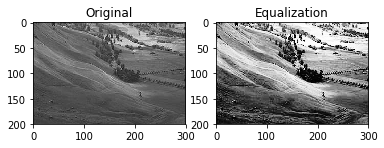

In [4]:
# Histogram Equalization
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('examples/hist.jpg', 0)

# OpenCV의 Equaliztion함수
img2 = cv2.equalizeHist(img)

plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(img2, cmap='gray'),plt.title('Equalization')
plt.show()

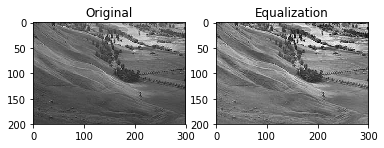

In [5]:
# CLAHE (Contrast Limited Adaptive Histogram Equalization)
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('examples/hist.jpg', 0)

# contrast limit가 2이고 title의 size는 8X8
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img2 = clahe.apply(img)

plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(img2, cmap='gray'),plt.title('Equalization')
plt.show()

### Image augumentation
- To generate additional data for unbalanced classes by jittering the original image

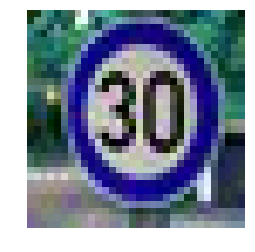

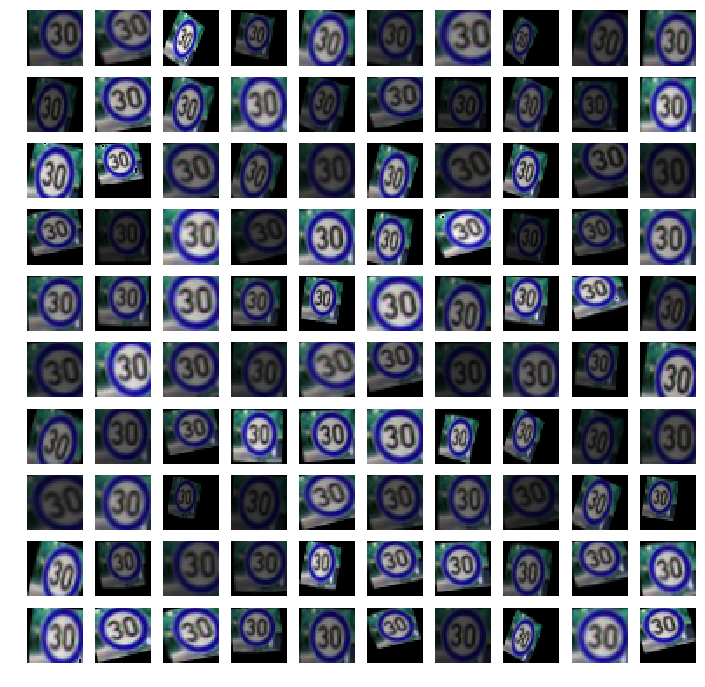

In [34]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    img = augment_brightness_camera_images(img)
    
    return img

image = cv2.imread('test/1.jpg')
plt.imshow(img);
plt.axis('off');

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,20,10,5)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

(100, 32, 32, 3)
[[[  25.   46.    7.]
  [  25.   46.    7.]
  [  25.   46.    7.]
  ..., 
  [  13.   86.   78.]
  [   0.   63.   54.]
  [   5.   60.   43.]]

 [[  25.   46.    7.]
  [  25.   46.    7.]
  [  25.   46.    7.]
  ..., 
  [  29.   99.   98.]
  [  21.   80.   82.]
  [  17.   75.   57.]]

 [[  13.   57.   28.]
  [  13.   57.   28.]
  [  13.   57.   28.]
  ..., 
  [  22.   89.   92.]
  [   4.   61.   70.]
  [  21.   80.   65.]]

 ..., 
 [[ 123.  105.  142.]
  [ 122.  103.  154.]
  [ 122.  103.  154.]
  ..., 
  [ 159.  169.  169.]
  [ 150.  161.  169.]
  [ 132.  148.  161.]]

 [[ 122.  103.  154.]
  [ 122.  103.  154.]
  [ 122.  103.  154.]
  ..., 
  [ 159.  169.  169.]
  [ 150.  161.  169.]
  [ 132.  148.  161.]]

 [[ 122.  103.  154.]
  [ 122.  103.  154.]
  [ 122.  103.  154.]
  ..., 
  [ 159.  169.  169.]
  [ 150.  161.  169.]
  [ 132.  148.  161.]]]


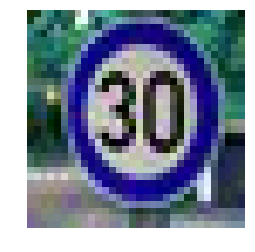

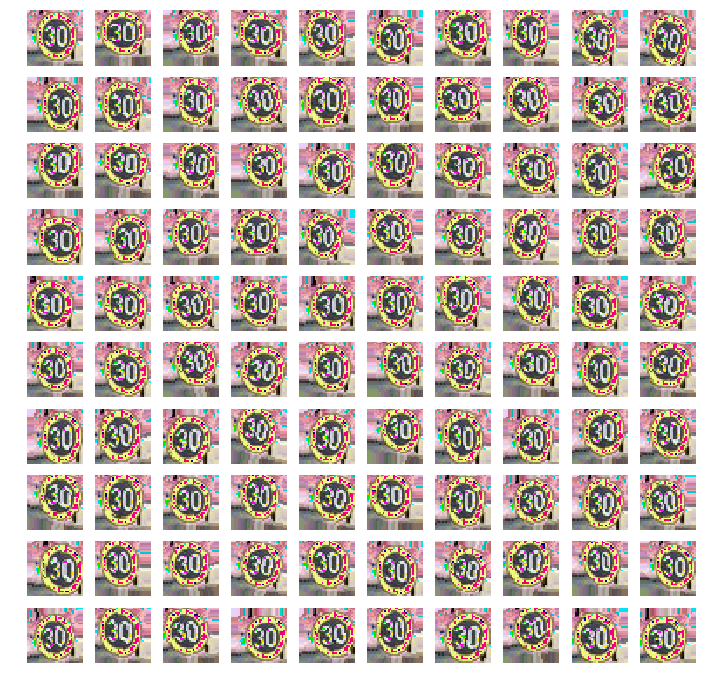

In [6]:
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False
)

img = cv2.imread('test/1.jpg')
plt.imshow(img);
plt.axis('off');

x_train = np.array([img])
y_train = np.array([1])

x_train_augmented = np.copy(x_train)
y_train_augmented = np.copy(y_train)

augment_size = 100

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=2):
    x_train_augmented = np.append(x_train_augmented, x_batch, axis=0)
    y_train_augmented = np.append(y_train_augmented, y_batch, axis=0)

    if len(x_train_augmented) >= augment_size:
        break

print(x_train_augmented.shape)
print(x_train_augmented[2])        

import matplotlib.gridspec as gridspec

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02)

plt.figure(figsize=(12,12))
i = 0
for image in x_train_augmented:
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    
    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.axis('off')
    i += 1

plt.show()

### Reference
- http://opencv-python.readthedocs.io/en/latest/index.html